In [22]:
from kagglehub import dataset_download
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
path = dataset_download("yufengdev/bbc-fulltext-and-category")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\nnn866470\.cache\kagglehub\datasets\yufengdev\bbc-fulltext-and-category\versions\2


In [3]:
df = pd.read_csv(path+ "/bbc-text.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
df.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,europe backs digital tv lifestyle how people r...
freq,511,2


In [6]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [7]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

Check for class weightage

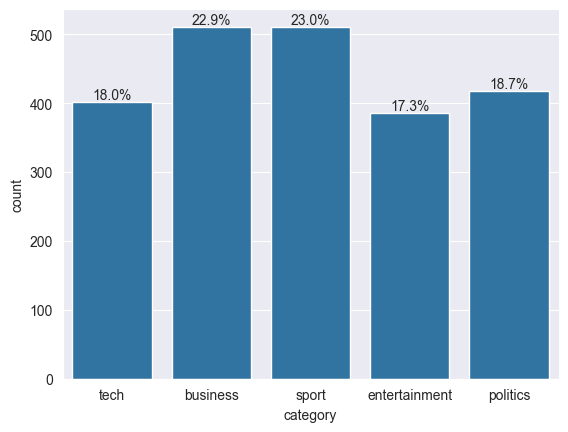

In [8]:
ax=sns.countplot(x=df['category'], data = df)
total = len(df['category'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

One hot encoding the category column

In [9]:
# Convert category column into numerical format
ohe = OneHotEncoder()
X_category = ohe.fit_transform(df[["category"]])

Apply TF IDF  to  the dataset to convert the text data into numerical

In [10]:
vectorizer = TfidfVectorizer(
    lowercase=True,        # make everything lowercase (default=True)
    stop_words='english',  # remove English stopwords (or give your own list)
    max_df=0.8,            # ignore words that appear in >80% of docs
    min_df=3,              # ignore words that appear in <3 docs
    ngram_range=(1,2)      # use unigrams and bigrams ("machine", "machine learning")
)

In [12]:
# convert text column into numerical format
X_text = vectorizer.fit_transform(df['text'])

In [15]:
# Merge both the sparse matrices = text + category
X_merged = hstack((X_text, X_category))

Elbow Method

In [17]:
# Step 1 : Use elbow method to get the optimal number of clusters.
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_merged).fit(X_merged)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method For Optimal k')

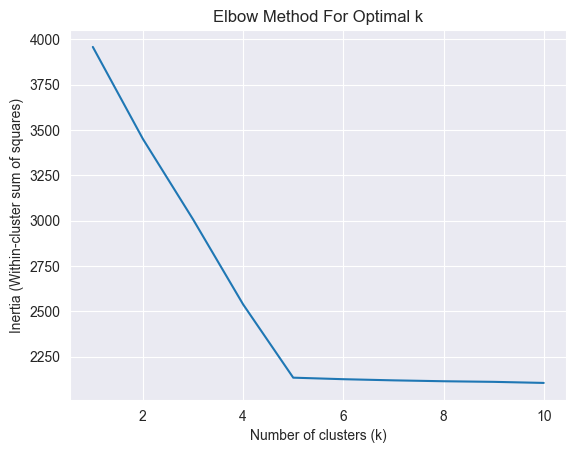

In [19]:
K = range(1,11)
plt.plot(K, inertia)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.title("Elbow Method For Optimal k")

Dimensionality reduction with PCA

In [23]:
X_reduced = PCA(n_components=2).fit_transform(X_merged.toarray())

K Means Clustering

In [20]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_merged)